In [3]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '559b31fb-1003-4235-a629-b1304c6e9abc',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
#go to anaconda command prompt and type:
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
#then copy the url from the cmd

{'status': {'timestamp': '2022-12-07T08:41:46.835Z', 'error_code': 0, 'error_message': None, 'elapsed': 16, 'credit_count': 1, 'notice': None, 'total_count': 8971}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9865, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [4]:
type(data)

dict

In [5]:
import pandas as pd

pd.set_option('display.max_columns', None) #the dots dissapeared. Makes the columns are seen all
pd.set_option('display.max_rows', None)

In [10]:
#pd.json_normalize(data['status'])

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now',utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9865,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19226643.00000,19226643.00000,NaN,1,NaN,NaN,None,2022-12-07T08:39:00.000Z,16802.37516,21477359575.84671,12.49300,0.00219,-1.14868,-0.53959,-18.75930,-13.80727,-12.49724,323053268848.33972,38.50270,352849878463.71002,None,2022-12-07T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-07 08:42:45.185280+00:00
1,1027,Ethereum,ETH,ethereum,6261,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2022-12-07T08:39:00.000Z,1230.20473,6096434110.60929,12.71480,-0.11125,-2.33174,-3.12396,-21.46873,-7.42928,-23.92477,150544908504.78223,17.94500,150544908504.78000,None,2022-12-07T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-07 08:42:45.185280+00:00
2,825,Tether,USDT,tether,44242,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65685215611.09682,73141766321.23428,NaN,3,NaN,NaN,None,2022-12-07T08:39:00.000Z,1.00009,27698531422.18192,7.93690,0.00116,-0.00389,0.02125,-0.00040,-0.00765,0.00274,65691027002.12692,7.83040,73148237418.28000,None,2022-12-07T08:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-07 08:42:45.185280+00:00
3,1839,BNB,BNB,bnb,1149,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159969257.24063,159979963.59043,NaN,4,NaN,NaN,None,2022-12-07T08:39:00.000Z,283.66734,706245404.05895,13.22030,0.10068,-1.84956,-5.75819,-13.87829,0.89608,2.00910,45378053676.70026,5.40830,56733467991.84000,None,2022-12-07T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-07 08:42:45.185280+00:00
4,3408,USD Coin,USDC,usd-coin,8741,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43014930505.12496,43014930505.12496,NaN,5,NaN,NaN,None,2022-12-07T08:39:00.000Z,0.99994,2526441781.77575,19.58100,0.02420,-0.00225,-0.01758,-0.01245,-0.01315,-0.01129,43012433630.45237,5.12640,43012433630.45000,None,2022-12-07T08:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-07 08:42:45.185280+00:00
5,4687,Binance USD,BUSD,binance-usd,5686,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,22056131821.62442,22056131821.62442,NaN,6,NaN,NaN,None,2022-12-07T08:39:00.000Z,0.99988,6021221741.94718,15.91650,-0.06099,0.00365,-0.01124,-0.00016,0.02158,-0.01726,22053556852.54297,2.62880,22053556852.54000,None,2022-12-07T08:39:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-12-07 08:42:45.185280+00:00
6,52,XRP,XRP,xrp,854,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50260446248.00000,99989199669.00000,NaN,7,NaN,NaN,None,2022-12-07T08:39:00.000Z,0.37918,869259141.29221,-2.01870,0.56014,-0.68256,-5.81085,-18.76244,-26.93276,14.31256,19057791874.80091,2.27170,37918071361.25000,None,2022-12-07T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-07 08:42:45.185280+00:00
7,74,Dogecoin,DOGE,dogecoin,608,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.89409,132670764299.89409,NaN,8,NaN,NaN,None,2022-12-07T08:39:00.000Z,0.09588,657470361.05749,-32.59780,0.19495,-4.79996,-9.82443,-16.60759,53.80352,58.60609,12720962939.19600,1.51630,12720962939.20000,None,2022-12-07T08:39

In [11]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '559b31fb-1003-4235-a629-b1304c6e9abc',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #NOTE:
    #go to anaconda command prompt and type:
    #jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
    #then copy the url from the cmd
    
    #1
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now',utc=True)
    #df_append = pd.DataFrame(df2)
    #df = pd.concat([df,df_append])
    
    #2
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now',utc=True)
    df
    
    if not os.path.isfile(r'C:\Users\ALIENWARE\API.csv'):
        df.to_csv(r'C:\Users\ALIENWARE\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\ALIENWARE\API.csv', mode='a', header=False)
    
    df = pd.read_csv(r'C:\Users\ALIENWARE\API.csv')

In [12]:
#make script
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API RUNNER COMPLETED SUCCESFULLY')
    sleep(60) #sleep for 1 minute
exit()

API RUNNER COMPLETED SUCCESFULLY
API RUNNER COMPLETED SUCCESFULLY
API RUNNER COMPLETED SUCCESFULLY
API RUNNER COMPLETED SUCCESFULLY
API RUNNER COMPLETED SUCCESFULLY
API RUNNER COMPLETED SUCCESFULLY
API RUNNER COMPLETED SUCCESFULLY
API RUNNER COMPLETED SUCCESFULLY
API RUNNER COMPLETED SUCCESFULLY
API RUNNER COMPLETED SUCCESFULLY
API RUNNER COMPLETED SUCCESFULLY
API RUNNER COMPLETED SUCCESFULLY
API RUNNER COMPLETED SUCCESFULLY
API RUNNER COMPLETED SUCCESFULLY
API RUNNER COMPLETED SUCCESFULLY
API RUNNER COMPLETED SUCCESFULLY
API RUNNER COMPLETED SUCCESFULLY
API RUNNER COMPLETED SUCCESFULLY


KeyboardInterrupt: 

In [13]:
df72 = pd.read_csv(r'C:\Users\ALIENWARE\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9865,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19225950.00000,19225950.00000,NaN,1,NaN,NaN,NaN,2022-12-06T14:52:00.000Z,17005.46877,19567857671.47302,-8.90210,-0.03728,-1.30198,3.36468,-19.92586,-13.53250,-10.08594,326946292268.79614,38.38490,357114844137.46997,NaN,2022-12-06T14:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 14:53:55.624074+00:00
1,1,1027,Ethereum,ETH,ethereum,6260,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2022-12-06T14:52:00.000Z,1255.83669,5528768467.29882,-5.21590,-0.14888,-2.43793,3.51107,-22.83303,-6.36460,-18.63163,153681590649.00598,18.04290,153681590649.01001,NaN,2022-12-06T14:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 14:53:55.624074+00:00
2,2,825,Tether,USDT,tether,44190,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,65576715611.09682,73141766321.23428,NaN,3,NaN,NaN,NaN,2022-12-06T14:51:00.000Z,1.00006,25982235764.34259,-3.12070,-0.00240,-0.00433,0.03288,-0.00041,-0.00237,-0.00312,65580450392.65633,7.70040,73145931954.07001,NaN,2022-12-06T14:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-06 14:53:55.624074+00:00
3,3,1839,BNB,BNB,bnb,1149,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,159969399.80770,159979963.59043,NaN,4,NaN,NaN,NaN,2022-12-06T14:52:00.000Z,288.86871,599866100.36293,-9.60810,0.09978,-1.48037,-4.06674,-17.63680,1.72577,8.11784,46210153436.70365,5.42530,57773741093.30000,NaN,2022-12-06T14:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 14:53:55.624074+00:00
4,4,3408,USD Coin,USDC,usd-coin,8698,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,43277505822.43587,43277505822.43587,NaN,5,NaN,NaN,NaN,2022-12-06T14:51:00.000Z,1.00011,2232547493.58996,-1.78710,0.01120,0.01170,-0.01098,0.01261,0.00984,0.00761,43282321976.94189,5.07940,43282321976.94000,NaN,2022-12-06T14:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-06 14:53:55.624074+00:00
5,5,4687,Binance USD,BUSD,binance-usd,5681,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,22100085744.15442,22100085744.15442,NaN,6,NaN,NaN,NaN,2022-12-06T14:51:00.000Z,1.00031,5561887441.54896,2.49160,0.00423,0.02312,0.03853,0.00751,0.05355,-0.01266,22106980643.94050,2.59430,22106980643.94000,NaN,2022-12-06T14:51:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-12-06 14:53:55.624074+00:00
6,6,52,XRP,XRP,xrp,854,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,50260446248.00000,99989199669.00000,NaN,7,NaN,NaN,NaN,2022-12-06T14:52:00.000Z,0.38757,890796220.56069,23.28810,0.22632,-1.48974,-1.38056,-20.86782,-21.03071,19.59229,19479467653.98886,2.28600,38757052728.64000,NaN,2022-12-06T14:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 14:53:55.624074+00:00
7,7,74,Dogecoin,DOGE,dogecoin,608,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,132670764299.89407,132670764299.89407,NaN,8,NaN,NaN,NaN,2022-12-06T14:52:00.000Z,0.10064,630644458.19833,-33.36060,-0.23841,-3.90929,-1.67773,-19.91790,61.36189,67.37968,13351935862.39308,1.56710,13351935862.39000,NaN,2022-12-06

In [14]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [15]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9865,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19225950.00000,19225950.00000,NaN,1,NaN,NaN,NaN,2022-12-06T14:52:00.000Z,17005.46877,19567857671.47302,-8.90210,-0.03728,-1.30198,3.36468,-19.92586,-13.53250,-10.08594,326946292268.79614,38.38490,357114844137.46997,NaN,2022-12-06T14:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 14:53:55.624074+00:00
1,1,1027,Ethereum,ETH,ethereum,6260,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2022-12-06T14:52:00.000Z,1255.83669,5528768467.29882,-5.21590,-0.14888,-2.43793,3.51107,-22.83303,-6.36460,-18.63163,153681590649.00598,18.04290,153681590649.01001,NaN,2022-12-06T14:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 14:53:55.624074+00:00
2,2,825,Tether,USDT,tether,44190,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,65576715611.09682,73141766321.23428,NaN,3,NaN,NaN,NaN,2022-12-06T14:51:00.000Z,1.00006,25982235764.34259,-3.12070,-0.00240,-0.00433,0.03288,-0.00041,-0.00237,-0.00312,65580450392.65633,7.70040,73145931954.07001,NaN,2022-12-06T14:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-06 14:53:55.624074+00:00
3,3,1839,BNB,BNB,bnb,1149,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,159969399.80770,159979963.59043,NaN,4,NaN,NaN,NaN,2022-12-06T14:52:00.000Z,288.86871,599866100.36293,-9.60810,0.09978,-1.48037,-4.06674,-17.63680,1.72577,8.11784,46210153436.70365,5.42530,57773741093.30000,NaN,2022-12-06T14:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 14:53:55.624074+00:00
4,4,3408,USD Coin,USDC,usd-coin,8698,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,43277505822.43587,43277505822.43587,NaN,5,NaN,NaN,NaN,2022-12-06T14:51:00.000Z,1.00011,2232547493.58996,-1.78710,0.01120,0.01170,-0.01098,0.01261,0.00984,0.00761,43282321976.94189,5.07940,43282321976.94000,NaN,2022-12-06T14:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-06 14:53:55.624074+00:00
5,5,4687,Binance USD,BUSD,binance-usd,5681,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,22100085744.15442,22100085744.15442,NaN,6,NaN,NaN,NaN,2022-12-06T14:51:00.000Z,1.00031,5561887441.54896,2.49160,0.00423,0.02312,0.03853,0.00751,0.05355,-0.01266,22106980643.94050,2.59430,22106980643.94000,NaN,2022-12-06T14:51:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-12-06 14:53:55.624074+00:00
6,6,52,XRP,XRP,xrp,854,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,50260446248.00000,99989199669.00000,NaN,7,NaN,NaN,NaN,2022-12-06T14:52:00.000Z,0.38757,890796220.56069,23.28810,0.22632,-1.48974,-1.38056,-20.86782,-21.03071,19.59229,19479467653.98886,2.28600,38757052728.64000,NaN,2022-12-06T14:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 14:53:55.624074+00:00
7,7,74,Dogecoin,DOGE,dogecoin,608,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,132670764299.89407,132670764299.89407,NaN,8,NaN,NaN,NaN,2022-12-06T14:52:00.000Z,0.10064,630644458.19833,-33.36060,-0.23841,-3.90929,-1.67773,-19.91790,61.36189,67.37968,13351935862.39308,1.56710,13351935862.39000,NaN,2022-12-06

In [25]:
#make group

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
type(df3)
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.08651,-1.31119,0.27764,-19.08027,-13.76000,-12.04056
Ethereum,-0.01686,-2.52670,-1.67698,-21.82696,-7.21301,-22.89767
Tether,0.00193,-0.00344,0.02229,-0.00073,-0.00644,0.00090
BNB,0.04089,-1.92692,-5.32559,-14.82946,1.08238,3.25652
USD Coin,0.01283,-0.00895,-0.01698,-0.00704,-0.00398,-0.01345
Binance USD,-0.00976,0.00089,-0.01989,-0.00071,0.01334,-0.02974
XRP,0.47818,-1.00737,-4.80598,-19.29826,-25.66861,15.22202
Dogecoin,0.13981,-4.86860,-7.92077,-17.48260,55.36861,60.27261
Cardano,0.12741,-2.63052,-0.83572,-23.92417,-26.91533,-33.85544


In [26]:
df4 = df3.unstack()
df4

                              name       
quote.USD.percent_change_1h   Bitcoin         0.08651
                              Ethereum       -0.01686
                              Tether          0.00193
                              BNB             0.04089
                              USD Coin        0.01283
                              Binance USD    -0.00976
                              XRP             0.47818
                              Dogecoin        0.13981
                              Cardano         0.12741
                              Polygon         0.41517
                              Polkadot        0.17874
                              Litecoin        0.12842
                              Dai             0.06265
                              Shiba Inu       0.15161
                              Solana         -0.55036
quote.USD.percent_change_24h  Bitcoin        -1.31119
                              Ethereum       -2.52670
                              Tether    

In [28]:
type(df4) #The unstack makes it become series. We have to change it to pandas

pandas.core.series.Series

In [31]:
df5 = df4.to_frame(name='values')
df5

values
                             name                 
quote.USD.percent_change_1h  Bitcoin       0.08651
                             Ethereum     -0.01686
                             Tether        0.00193
                             BNB           0.04089
                             USD Coin      0.01283
                             Binance USD  -0.00976
                             XRP           0.47818
                             Dogecoin      0.13981
                             Cardano       0.12741
                             Polygon       0.41517
                             Polkadot      0.17874
                             Litecoin      0.12842
                             Dai           0.06265
                             Shiba Inu     0.15161
                             Solana       -0.55036
quote.USD.percent_change_24h Bitcoin      -1.31119
                             Ethereum     -2.52670
                             Tether       -0.00344
                             BNB          -1.92692
                             USD Coin     -0.00895
                             Binance USD   0.00089
                             XRP          -1.00737
                             Dogecoin     -4.86860
                             Cardano      -2.63052
                             Polygon      -3.05840
                             Polkadot     -3.47227
                             Litecoin     -4.29143
                             Dai          -0.03010
                             Shiba Inu    -3.45452
                             Solana       -2.96379
quote.USD.percent_change_7d  Bitcoin       0.27764
                             Ethereum     -1.67698
                             Tether        0.02229
                             BNB          -5.32559
                             USD Coin     -0.01698
                             Binance USD  -0.01989
                             XRP          -4.80598
                             Dogecoin     -7.92077
                             Cardano      -0.83572
                             Polygon       3.00336
                             Polkadot     -1.01250
                             Litecoin     -0.14200
                             Dai          -0.06829
                             Shiba Inu    -1.39736
                             Solana       -0.16371
quote.USD.percent_change_30d Bitcoin     -19.08027
                             Ethereum    -21.82696
                             Tether       -0.00073
                             BNB         -14.82946
                             USD Coin     -0.00704
                             Binance USD  -0.00071
                             XRP         -19.29826
                             Dogecoin    -17.48260
                             Cardano     -23.92417
                             Polygon     -24.58177
                             Polkadot    -21.92037
                             Litecoin     10.30174
                             Dai          -0.08141
                             Shiba Inu   -24.48695
                             Solana      -57.62473
quote.USD.percent_change_60d Bitcoin     -13.76000
                             Ethereum     -7.21301
                             Tether       -0.00644
                             BNB           1.08238
                             USD Coin     -0.00398
                             Binance USD   0.01334
                             XRP         -25.66861
                             Dogecoin     55.36861
                             Cardano     -26.91533
                             Polygon       7.52034
                             Polkadot    -15.99602
                             Litecoin     45.47093
                             Dai          -0.03043
                             Shiba Inu   -17.63738
                             Solana      -58.49386
quote.USD.percent_change_90d Bitcoin     -12.04056
                             Ethereum    -22.89767
               

In [44]:
df6 = df5.reset_index()
df6

,level_0,name,values
0,quote.USD.percent_change_1h,Bitcoin,0.08651
1,quote.USD.percent_change_1h,Ethereum,-0.01686
2,quote.USD.percent_change_1h,Tether,0.00193
3,quote.USD.percent_change_1h,BNB,0.04089
4,quote.USD.percent_change_1h,USD Coin,0.01283
5,quote.USD.percent_change_1h,Binance USD,-0.00976
6,quote.USD.percent_change_1h,XRP,0.47818
7,quote.USD.percent_change_1h,Dogecoin,0.13981
8,quote.USD.percent_change_1h,Cardano,0.12741
9,quote.USD.percent_change_1h,Polygon,0.41517


In [45]:
df7 = df6.rename(columns={'level_0' : 'percent_change'})
df7

,percent_change,name,values
0,quote.USD.percent_change_1h,Bitcoin,0.08651
1,quote.USD.percent_change_1h,Ethereum,-0.01686
2,quote.USD.percent_change_1h,Tether,0.00193
3,quote.USD.percent_change_1h,BNB,0.04089
4,quote.USD.percent_change_1h,USD Coin,0.01283
5,quote.USD.percent_change_1h,Binance USD,-0.00976
6,quote.USD.percent_change_1h,XRP,0.47818
7,quote.USD.percent_change_1h,Dogecoin,0.13981
8,quote.USD.percent_change_1h,Cardano,0.12741
9,quote.USD.percent_change_1h,Polygon,0.41517


In [51]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,percent_change,name,values
0,1h,Bitcoin,0.08651
1,1h,Ethereum,-0.01686
2,1h,Tether,0.00193
3,1h,BNB,0.04089
4,1h,USD Coin,0.01283
5,1h,Binance USD,-0.00976
6,1h,XRP,0.47818
7,1h,Dogecoin,0.13981
8,1h,Cardano,0.12741
9,1h,Polygon,0.41517


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

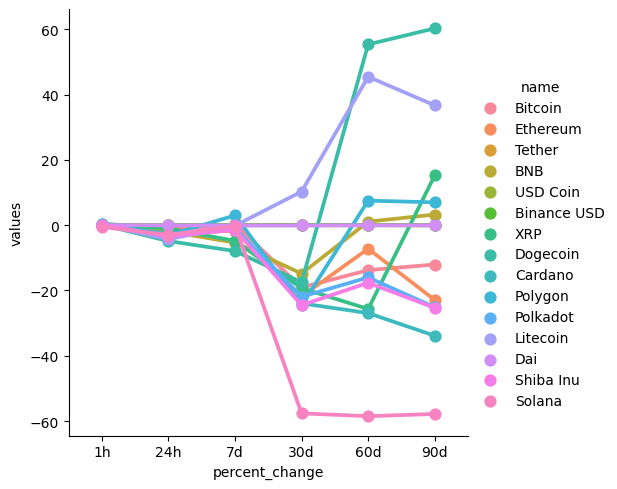

In [57]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')
plt.show()

In [59]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name=='Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,17005.46877,2022-12-06 14:53:55.624074+00:00
15,Bitcoin,17005.89080,2022-12-06 14:54:56.192268+00:00
30,Bitcoin,17006.19398,2022-12-06 14:55:56.809873+00:00
45,Bitcoin,17006.53359,2022-12-06 14:56:58.039718+00:00
60,Bitcoin,17008.48064,2022-12-06 14:57:59.282804+00:00
75,Bitcoin,16810.91789,2022-12-07 08:42:51.339233+00:00
90,Bitcoin,16809.54574,2022-12-07 08:43:52.771698+00:00
105,Bitcoin,16801.25440,2022-12-07 08:44:53.400152+00:00
120,Bitcoin,16798.99951,2022-12-07 08:45:54.021705+00:00
135,Bitcoin,16800.39946,2022-12-07 08:46:54.747528+00:00


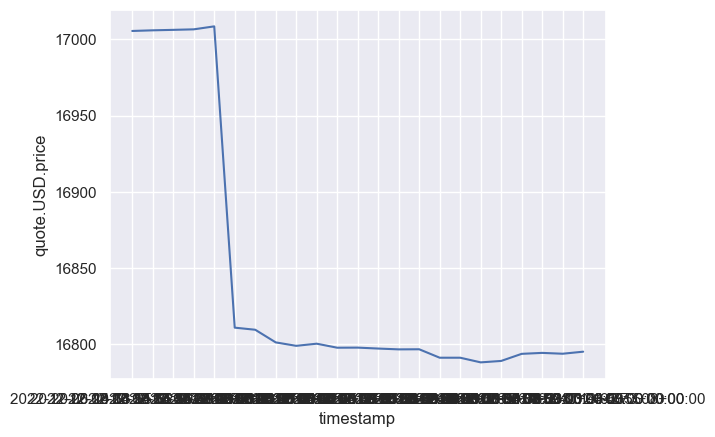

In [65]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)
plt.show() #the result looks like that because there are a lot of timestamps